## Simple example using pykegg

IGRAPH DN-T 58 22 --
+ attr: bgcolor (v), coords (v), fgcolor (v), graphics_name (v), group (v),
  height (v), id (v), name (v), orig_id (v), original_type (v), type (v),
  width (v), x (v), xmax (v), xmin (v), y (v), ymax (v), ymin (v),
  entry1_orig_id (e), entry2_orig_id (e), reaction (e), subtypes (e), type (e)
+ edges (vertex names):
undefined->hsa:55215, undefined->hsa:2177, hsa:2177->hsa:675,
undefined->hsa:5889, hsa:675->hsa:5888, hsa:2177->hsa:22909, hsa:545->hsa:672,
undefined->hsa:55120, undefined->hsa:57697, undefined->hsa:29935 hsa:6117
hsa:6118 hsa:6119, hsa:22909->undefined, undefined->hsa:57697,
hsa:83990->undefined, hsa:83990->undefined, hsa:91442->hsa:9894,
undefined->hsa:2175, undefined->hsa:2189, undefined->hsa:55215,
undefined->hsa:57697, hsa:9894->hsa:545, hsa:57697->hsa:91442,
hsa:57697->hsa:100526739 hsa:201254 hsa:378708


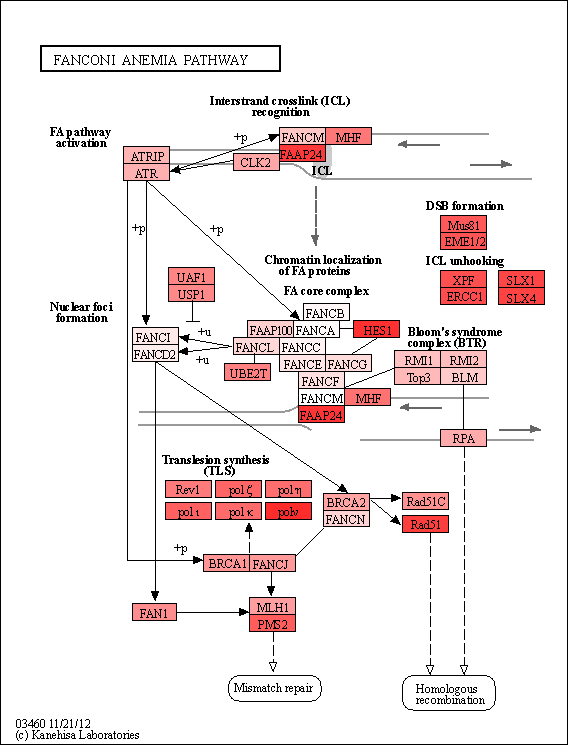

In [1]:
import requests_cache
import numpy as np
from PIL import Image
import pykegg

## Make sure to cache all the downloaded files to avoid recursive connection
requests_cache.install_cache('pykegg_cache')
g = pykegg.KGML_graph(pid="hsa03460")

## Export as igraph
gra = g.get_graph()
print(gra)

## Overlay to raw image
nds = g.get_nodes()

## Assign random color
nds["lfc"] = np.arange(-2,2,0.01)[0:nds.shape[0]]
nds["color"] = nds.lfc.apply(lambda x: round(x,3)).replace(pykegg.color_grad(minimum=min(nds.lfc), maximum=max(nds.lfc),seq=0.01))
Image.fromarray(pykegg.overlay_opencv_image(nds, pid="hsa03460"))

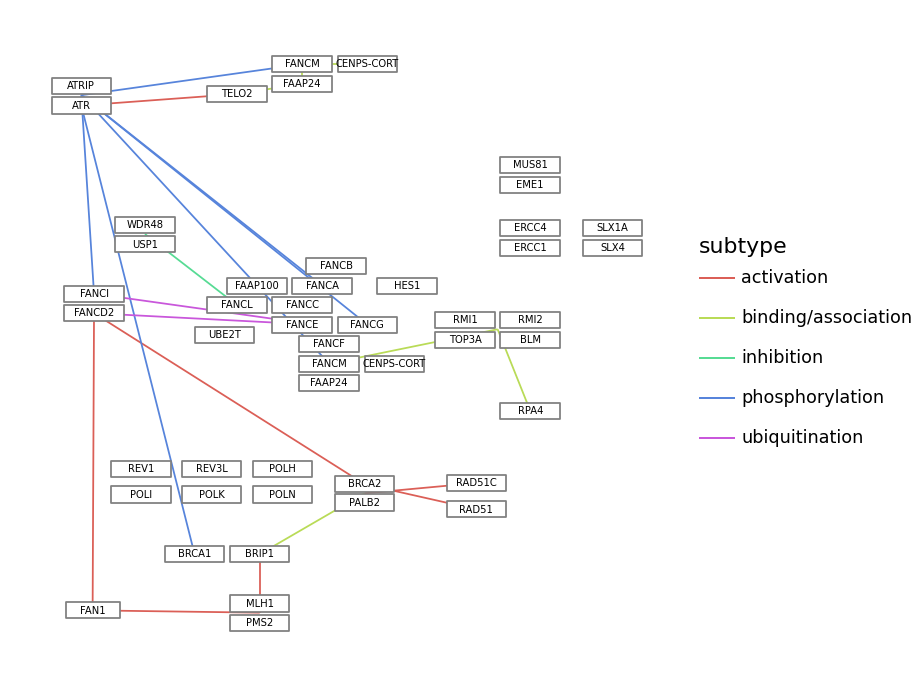

<Figure Size: (460 x 345)>

In [3]:
## Plot using plotnine
# options.figure_size = (7,5)
pykegg.plot_kegg_pathway_plotnine(g, node_x_nudge=25, label_size=5, show_label="gene")